<a href="https://colab.research.google.com/github/Minch13r/DeepLearn/blob/main/1%EC%A3%BC%EC%B0%A8_%EA%B3%BC%EC%A0%9C(abalone).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas scikit-learn tensorflow matplotlib

데이터 불러오기 및 전처리

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf

# 1. 데이터 로드 (raw GitHub URL)
url = 'https://raw.githubusercontent.com/MyungKyuYi/AI-class/main/abalone.csv'
column_names = ['id', 'Sex', 'Length', 'Diameter', 'Height', 'Whole_weight',
                'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings']
data = pd.read_csv(url, names=column_names)

# 2. 전처리: 범주형 변수(Sex)를 숫자로 변환
data['Sex'] = LabelEncoder().fit_transform(data['Sex'])  # M: 2, F: 0, I: 1

# 3. Features와 Label 분리 (id와 범주형 Sex는 제거)
X = data.drop(['Rings', 'id'], axis=1)  # 'id' 열과 레이블 'Rings' 제거
X = X.apply(pd.to_numeric, errors='coerce')  # 모든 열을 수치형으로 변환 (필요할 경우)
y = data['Rings']

# 4. 데이터 분할 (train/test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. 데이터 정규화 (수치형 데이터만 스케일링)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Data Loaded and Preprocessed Successfully!")


Data Loaded and Preprocessed Successfully!


머신러닝 모델 : 분류와 회귀

In [5]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
import numpy as np

# 데이터 로드 및 전처리 부분은 생략하고, 예제 데이터 사용

# 결측값(NaN) 처리: SimpleImputer로 결측값 대체
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# y_train, y_test가 숫자형인지 확인 및 변환
y_train = pd.to_numeric(y_train, errors='coerce')
y_test = pd.to_numeric(y_test, errors='coerce')

# 결측값(NaN) 처리: 결측값 제거
y_train = y_train.dropna()
y_test = y_test.dropna()

# X_train과 X_test의 결측값을 제거한 후 y_train과 y_test에 맞추어 데이터 필터링
# y_train, y_test가 Series인 경우, 인덱스를 기준으로 데이터를 맞춥니다.
X_train = X_train[:len(y_train)]  # X_train의 길이를 y_train에 맞추기
X_test = X_test[:len(y_test)]      # X_test의 길이를 y_test에 맞추기

# Rings 값을 이산형으로 구간화 (분류 문제) - 범주형을 정수형으로 변환
y_train_class = pd.cut(y_train, bins=[0, 8, 10, 15, 30], labels=[0, 1, 2, 3]).astype(int)
y_test_class = pd.cut(y_test, bins=[0, 8, 10, 15, 30], labels=[0, 1, 2, 3]).astype(int)

# 분류 모델 학습
clf = LogisticRegression(max_iter=500)
clf.fit(X_train, y_train_class)

# 예측 및 성능 평가
y_pred_class = clf.predict(X_test)

print(classification_report(y_test_class, y_pred_class))


              precision    recall  f1-score   support

           0       0.41      0.82      0.54       283
           1       0.35      0.30      0.32       268
           2       0.33      0.05      0.09       225
           3       0.00      0.00      0.00        60

    accuracy                           0.39       836
   macro avg       0.27      0.29      0.24       836
weighted avg       0.34      0.39      0.31       836



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


회귀 모델

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 회귀 모델 학습
reg = LinearRegression()
reg.fit(X_train, y_train)

# 예측 및 성능 평가
y_pred_reg = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred_reg)
print(f'MSE (회귀): {mse}')


MSE (회귀): 11.36220713787553


신경망 모델 : 분류와 회귀

In [7]:
# 신경망 분류 모델 구축
model_class = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')  # 출력 노드는 분류 구간 수와 동일하게
])

model_class.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 분류 모델 학습
model_class.fit(X_train, y_train_class, epochs=20, batch_size=32, validation_data=(X_test, y_test_class))


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3042 - loss: 1.3302 - val_accuracy: 0.3983 - val_loss: 1.2745
Epoch 2/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3160 - loss: 1.2837 - val_accuracy: 0.3385 - val_loss: 1.2826
Epoch 3/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3234 - loss: 1.2635 - val_accuracy: 0.3923 - val_loss: 1.2854
Epoch 4/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3377 - loss: 1.2759 - val_accuracy: 0.4282 - val_loss: 1.2639
Epoch 5/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3544 - loss: 1.2641 - val_accuracy: 0.4115 - val_loss: 1.2656
Epoch 6/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3321 - loss: 1.2729 - val_accuracy: 0.3589 - val_loss: 1.2930
Epoch 7/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3207 - loss: 1.2685 - val_accuracy: 0.3852 - val_loss: 1.2574
Epoch 8/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3368 - loss: 1.2639 - val_accuracy: 0.4103 - val_

회귀 신경망 모델

In [8]:
# 신경망 회귀 모델 구축
model_reg = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # 출력은 연속형 값 하나
])

model_reg.compile(optimizer='adam', loss='mse')

# 회귀 모델 학습
model_reg.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 73.9303 - val_loss: 32.4939
Epoch 2/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23.4268 - val_loss: 15.2739
Epoch 3/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12.1879 - val_loss: 13.4213
Epoch 4/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.4805 - val_loss: 11.9633
Epoch 5/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11.7074 - val_loss: 12.6270
Epoch 6/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13.0140 - val_loss: 11.5915
Epoch 7/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11.3308 - val_loss: 10.7038
Epoch 8/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11.3306 - val_loss: 13.0639
Epoch 9/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11.3099 - val_loss: 12.0993
Epoch 10/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10.9110 - val_loss: 12.6314
Epoch 11/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10.8321 - val_loss: 11.6625
Epoch 12/20
105/105 ━━━━━━━━━━

혼동 행렬 (Confusion Matrix)

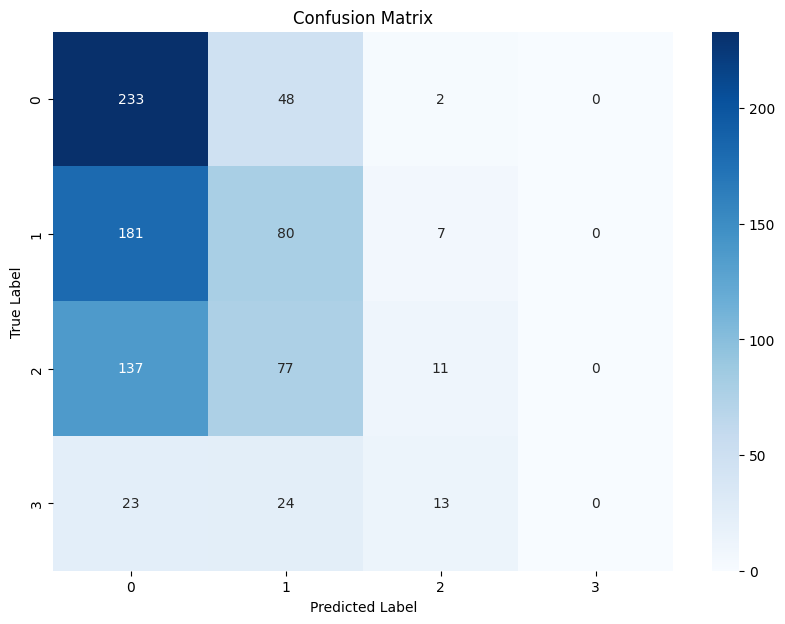

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 혼동 행렬 계산
cm = confusion_matrix(y_test_class, y_pred_class, labels=[0, 1, 2, 3])

# 혼동 행렬 시각화
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

ROC 곡선 및 AUC

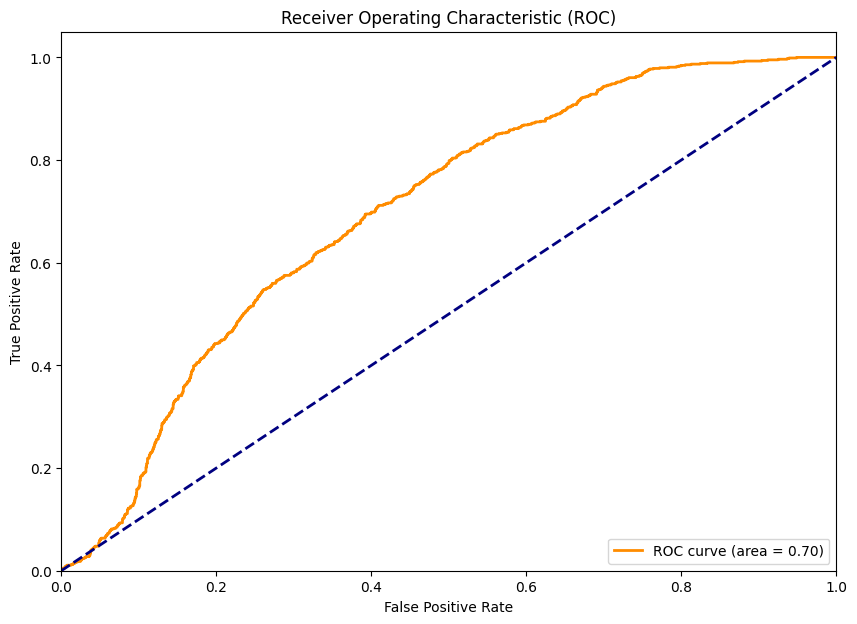

In [10]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# 이진 레이블로 변환
y_test_bin = label_binarize(y_test_class, classes=[0, 1, 2, 3])
y_pred_bin = clf.decision_function(X_test)

# ROC 곡선과 AUC 계산
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_bin.ravel())
roc_auc = auc(fpr, tpr)

# ROC 곡선 시각화
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


정밀도-재현율 곡선

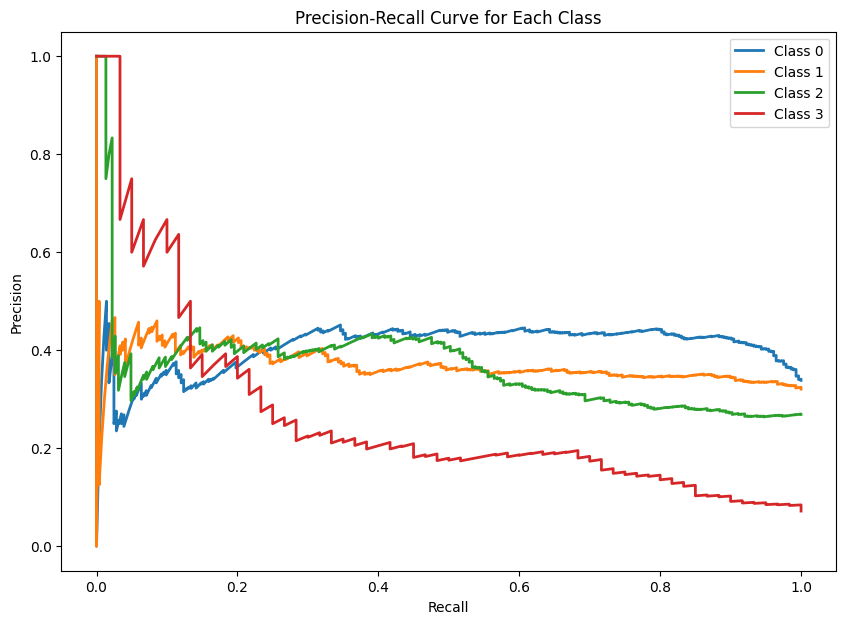

In [12]:
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize

# 레이블 이진화 (다중 클래스 문제를 위한 준비)
y_test_bin = label_binarize(y_test_class, classes=[0, 1, 2, 3])
y_pred_prob = clf.predict_proba(X_test)

# 각 클래스에 대해 정밀도-재현율 곡선 계산 및 시각화
plt.figure(figsize=(10, 7))

for i in range(y_test_bin.shape[1]):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_pred_prob[:, i])
    plt.plot(recall, precision, lw=2, label=f'Class {i}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Each Class')
plt.legend(loc='best')
plt.show()
